# Simulation for Lorentz

In [72]:
import lorenz_map as lmap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [73]:
# The generator: 
gen = lmap.LorenzMap(delta_t=1e-3)   #we've to take small steps to generate correctly the data

In [74]:
# The simulation
res =  gen.full_traj(init_pos=np.ones(3)*0.01, nb_steps=100000)
print(res.shape)

(100000, 3)


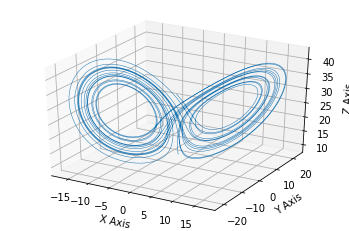

In [75]:
lmap.plot_traj(res[80000:])


# Look at the component

(20000, 3)


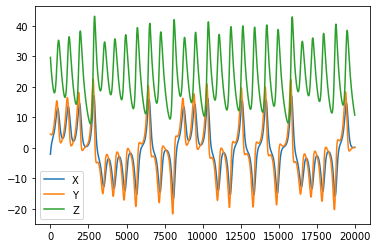

In [76]:
ext = res[80000:]
l = ['X', 'Y', 'Z']
print(ext.shape)
for i in range(3):
    plt.plot(ext[:,i],label=l[i])
plt.legend()
plt.show()
#print(ext[:,0])

We can see that the behavior of Z is different from X and Y. Z is almost the same in all trajectories. As we can see in the figure describing the trajectory, the oscillation in Z is always the same in both centers of oscillation (between 20 and 40). In the case of X and Y, we see that they change the pattern of oscillation aleatorily - its change is linked to the chaotic behavior of the system. The system can oscillate in the positive attractor (around 0 - 20) or the negative one (around -20 - 0) - and the change from one to the other is almost "random". We can see in another way here below:

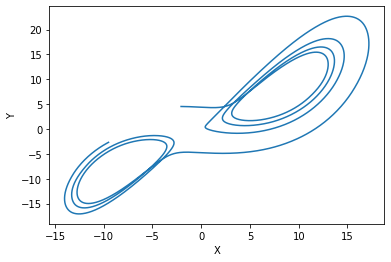

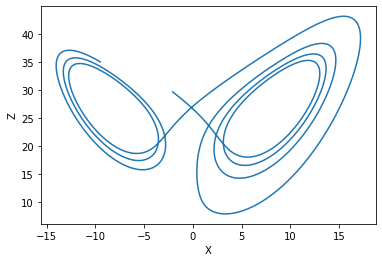

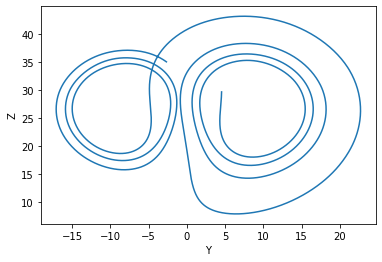

In [77]:
r = range(5000)
#r = range(ext.shape[0])
plt.plot(ext[r,0],ext[r,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(ext[r,0],ext[r,2])
plt.xlabel('X')
plt.ylabel('Z')
plt.show()
plt.plot(ext[r,1],ext[r,2])
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()

# The deltas

(20000, 3)


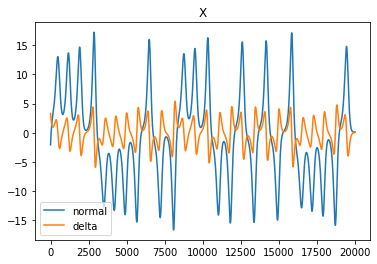

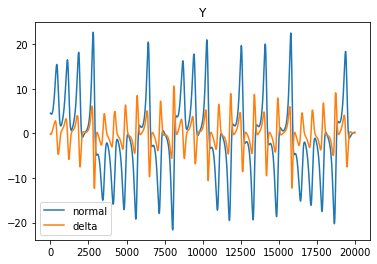

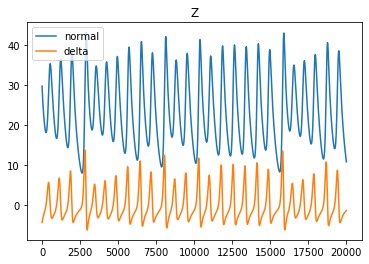

In [78]:
L = 20000 # length
S = 80000 # start
C = 1     # component

delta = res[S:S+L,:]-res[S-1:S+L-1,:]
print(delta.shape)

for i in range(3):
    delta2 = delta[:,i]*50
    plt.plot(res[S:S+L,i],label='normal')
    plt.plot(delta2, label='delta')
    plt.legend()
    plt.title(l[i])
    plt.show()

# The norm of delta

In [79]:
ndelta = np.square(delta)
ndelta = ndelta.sum(axis=1)
print(ndelta.shape)


(20000,)


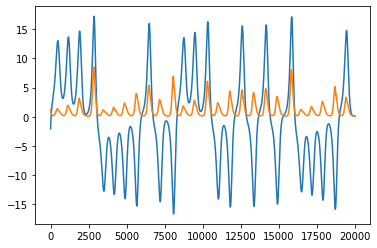

In [80]:
plt.plot(res[S:S+L,0])
plt.plot(ndelta*100)
plt.show()


# Sensitivity to initial conditions

Let's take a look at the trajectories of different initial conditions

In [81]:
# The simulation of other trajectories

res2 =  gen.full_traj(init_pos=np.ones(3)*0.011, nb_steps=100000)

res3 =  gen.full_traj(init_pos=np.ones(3)*0.03, nb_steps=100000)

# res was with one*0.01

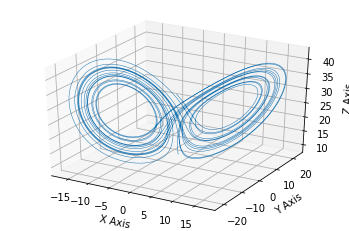

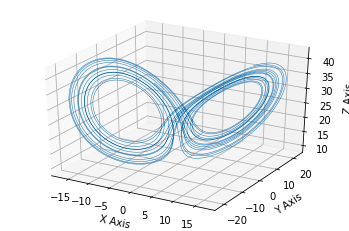

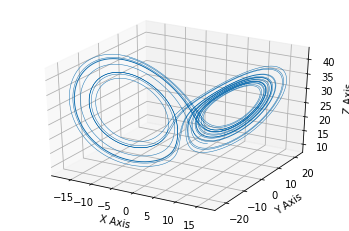

In [85]:
lmap.plot_traj(res[80000:])
lmap.plot_traj(res2[80000:])
lmap.plot_traj(res3[80000:])

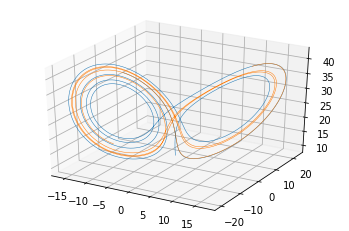

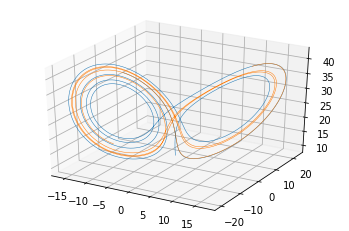

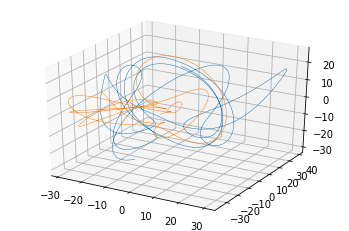

In [110]:
x, y, z = res[95000:, 0], res[95000:, 1], res[95000:, 2]
plt.gca(projection='3d')
plt.plot(x, y, z, lw=0.5)
x2, y2, z2 = res2[95000:, 0], res2[95000:, 1], res2[95000:, 2]
plt.gca(projection='3d')
plt.plot(x2, y2, z2, lw=0.5)

plt.show()


x, y, z = res[95000:, 0], res[95000:, 1], res[95000:, 2]
plt.gca(projection='3d')
plt.plot(x, y, z, lw=0.5)

x3, y3, z3 = res3[95000:, 0], res3[95000:, 1], res3[95000:, 2]
plt.gca(projection='3d')
plt.plot(x2, y2, z2, lw=0.5)

plt.show()


plt.gca(projection='3d')
plt.plot(x-x2, y-y2, z-z2, lw=0.5)

plt.gca(projection='3d')
plt.plot(x-x3, y-y3, z-z3, lw=0.5)

plt.show()

(20000, 3)


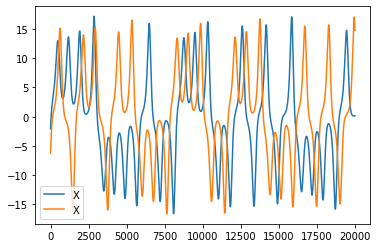

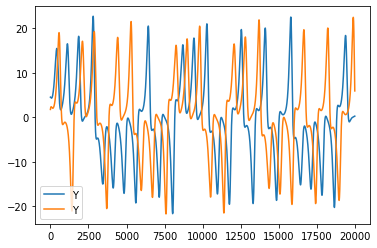

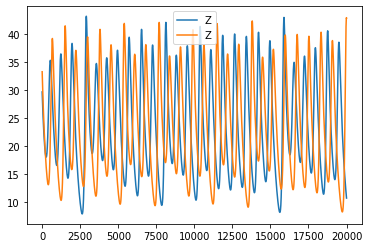

In [84]:
ext = res[80000:]
ext2 = res2[80000:]
ext3 = res3[80000:]
l = ['X', 'Y', 'Z']
print(ext.shape)
for i in range(3):
    plt.plot(ext[:,i],label=l[i])
    plt.plot(ext2[:,i],label=l[i])
    #plt.plot(ext3[:,i],label=l[i])
    plt.legend()
    plt.show()
#print(ext[:,0])